In [5]:
# 1. Load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/synthetic_transaction_data.csv")
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

df.head()

,transaction_id,user_id,date,amount,category,description,payment_method,month,year
0,fb0e7644-f4e2-4f77-bf34-b87896e5bc81,135,2025-04-08,98.77,Bills,Electricity bill,Credit Card,4,2025
1,3df9a3f2-0e7a-4818-bdad-4f013b35ebca,186,2024-12-26,3814.12,Travel,Ola trip,UPI,12,2024
2,6e5937d9-fb87-4086-9a4e-8d3285c2f3fc,111,2024-12-09,111.98,Entertainment,Gaming top-up,Credit Card,12,2024
3,69d8909e-e72e-46fb-9a25-5b1bb3808d79,191,2025-04-27,3025.60,Travel,Uber ride,Netbanking,4,2025
4,704329e7-7ea4-4a2d-a87a-95e2039ee0ac,100,2025-01-27,3151.70,Travel,Train ticket,Credit Card,1,2025


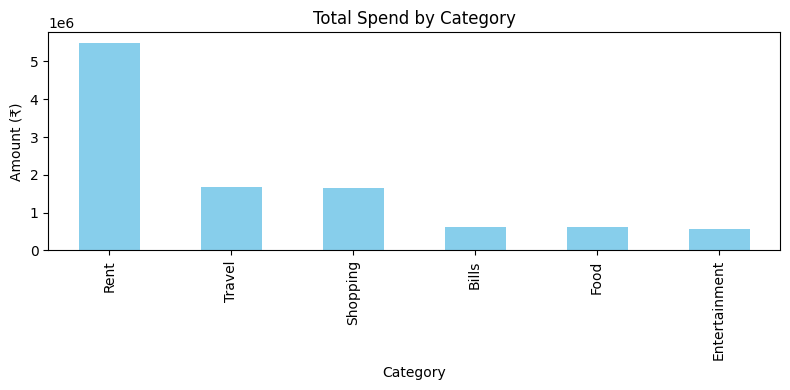

In [7]:
# 2. Spend by category
df.groupby('category')['amount'].sum().sort_values(ascending=False).plot(
    kind='bar', title='Total Spend by Category', figsize=(8, 4), color='skyblue'
)
plt.ylabel("Amount (₹)")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


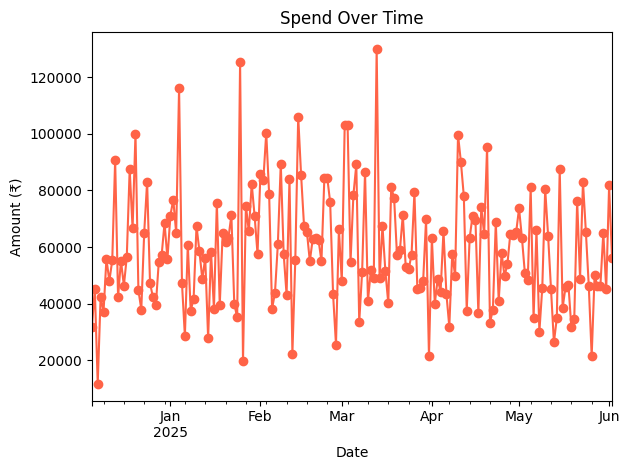

In [8]:
# 3. Spend over time
df.groupby('date')['amount'].sum().plot(
    kind='line', title='Spend Over Time', marker='o', color='tomato'
)
plt.ylabel("Amount (₹)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()


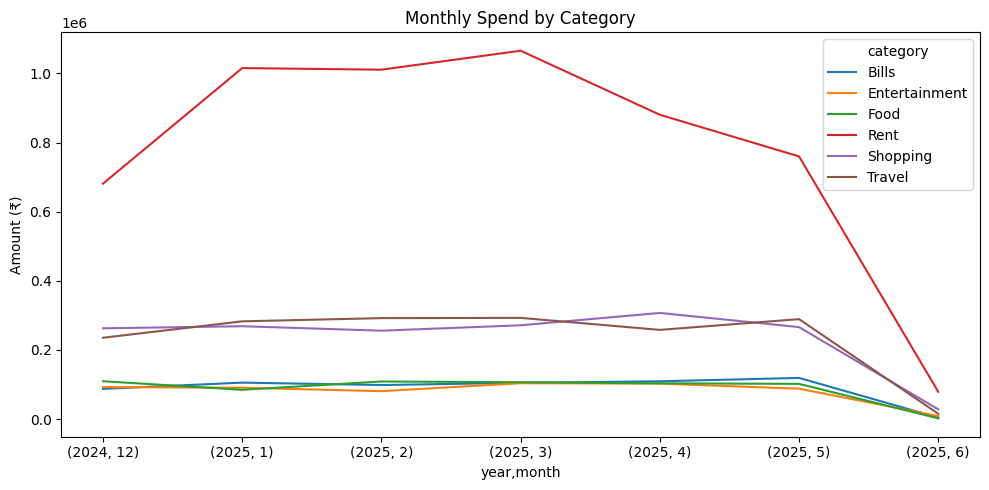

In [9]:
# 4. Per-category monthly trend
monthly = df.groupby(['year', 'month', 'category'])['amount'].sum().unstack()
monthly.plot(title="Monthly Spend by Category", figsize=(10, 5))
plt.ylabel("Amount (₹)")
plt.tight_layout()
plt.show()


In [10]:
# 5. Preview top spending day
df.sort_values(by='amount', ascending=False).head()


,transaction_id,user_id,date,amount,category,description,payment_method,month,year
379,cd14e287-cdf7-4a57-be99-7c8b9c8ac508,192,2025-01-19,14995.95,Rent,PG fees,Netbanking,1,2025
3390,96775563-4a71-433b-bb93-7ae40263e274,188,2025-01-30,14978.85,Rent,PG fees,UPI,1,2025
22,186990f0-d91e-4a77-ba8e-72b44c97616f,117,2025-03-13,14973.26,Rent,Monthly rent,Netbanking,3,2025
3038,85406fec-9e8e-482d-9847-beb0fb05bbdc,143,2024-12-28,14961.54,Rent,PG fees,UPI,12,2024
3039,65b305ca-a02a-4260-aad0-fc10093709e0,184,2025-01-25,14950.97,Rent,Hostel rent,Netbanking,1,2025
